In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
dataset_link="https://www.kaggle.com/competitions/udea-ai4eng-20242"
od.download(dataset_link)
#{"username":"gonzandres","key":"fa2731bdd837290a987f98515ff47e13"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gonzandres
Your Kaggle Key: ··········


100%|██████████| 20.1M/20.1M [00:00<00:00, 44.4MB/s]



Extracting archive ./udea-ai4eng-20242/udea-ai4eng-20242.zip to ./udea-ai4eng-20242


In [ ]:
import os
os.chdir("udea-ai4eng-20242")
os.listdir()

['test.csv', 'submission_example.csv', 'train.csv']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train ="train.csv"
df =pd.read_csv(train)
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
print(df.shape)
print("-------------")
print(df.isnull().sum())
print("-------------")
print(df.info())

(692500, 12)
-------------
ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-nu

In [ ]:
# Valores únicos por columna
df['ESTU_PRGM_DEPARTAMENTO'].value_counts()

df['FAMI_ESTRATOVIVIENDA'].value_counts()

df['ESTU_PRGM_ACADEMICO'].value_counts()

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA,1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES,1
ADMINISTRACION DE COMERCIO EXTERIOR,1


In [ ]:
import pandas as pd

unique_counts = df.nunique()

# Convert the result to a dataframe for better visualization
unique_counts_df = pd.DataFrame(unique_counts, columns=['Unique Count'])

# Print the result
unique_counts_df

,Unique Count
ID,692500
PERIODO,9
ESTU_PRGM_ACADEMICO,948
ESTU_PRGM_DEPARTAMENTO,31
ESTU_VALORMATRICULAUNIVERSIDAD,8
ESTU_HORASSEMANATRABAJA,5
FAMI_ESTRATOVIVIENDA,7
FAMI_TIENEINTERNET,2
FAMI_EDUCACIONPADRE,12
FAMI_EDUCACIONMADRE,12


In [ ]:
max_programa = df['ESTU_PRGM_ACADEMICO'].value_counts().idxmax()
num_max_programa = df['ESTU_PRGM_ACADEMICO'].value_counts().max()
print(f"El programa académico con más registros es '{max_programa}' con {num_max_programa} registros.")

El programa académico con más registros es 'DERECHO' con 53244 registros.


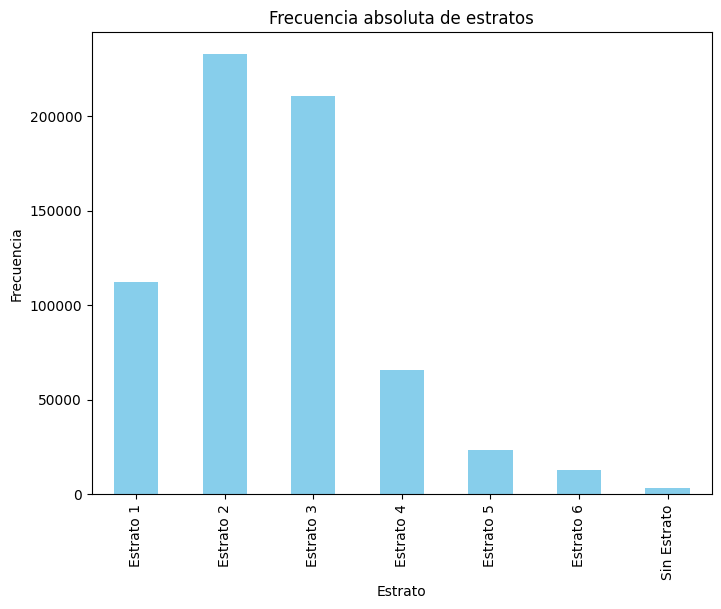

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

estrato_counts = df['FAMI_ESTRATOVIVIENDA'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
estrato_counts.plot(kind='bar', color='skyblue')
plt.title('Frecuencia absoluta de estratos')
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.show()

<Axes: >

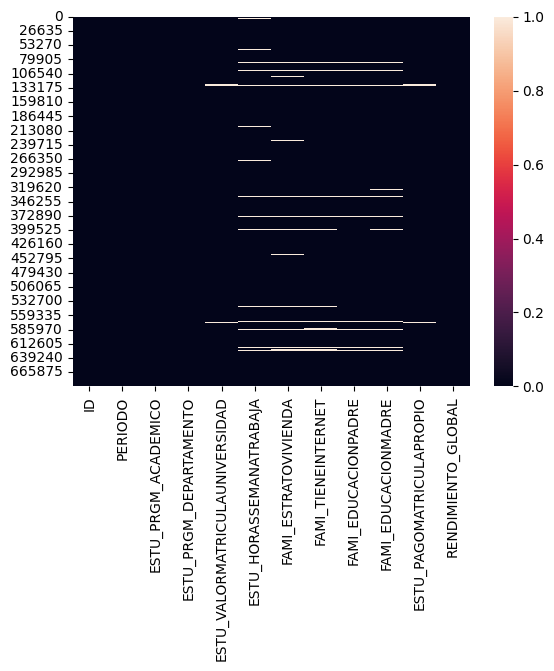

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df._get_numeric_data().describe().T
#There are no numerical variables

,count,mean,std,min,25%,50%,75%,max
ID,692500.0,494606.130576,285585.209455,1.0,247324.75,494564.5,741782.5,989286.0
PERIODO,692500.0,20198.366679,10.535037,20183.0,20195.00,20195.0,20203.0,20213.0


In [ ]:
## KEEPOUTPUT
k = df.isna().sum()
k[k!=0]

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664
ESTU_PAGOMATRICULAPROPIO,6498
